# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience </a>

In [ ]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from skimage.transform import resiz

Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [ ]:
def draw_likelihood(density_function, grid, samples, label):
    '''
    Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    '''
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = np.prod(density_function(sample), axis=1)
        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

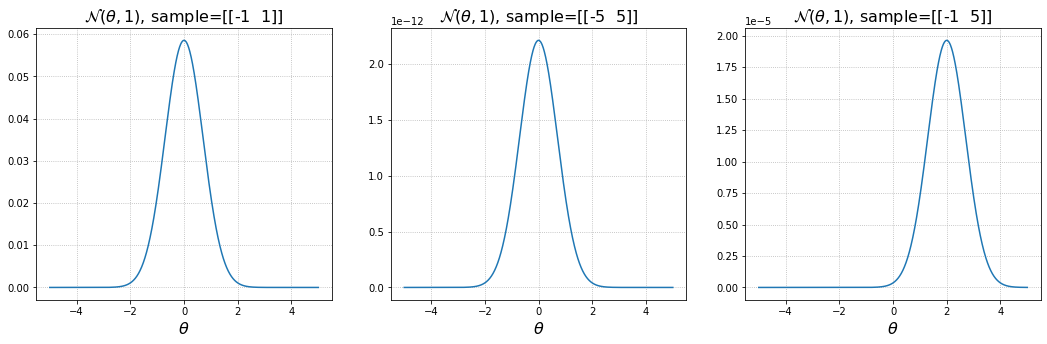

In [ ]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

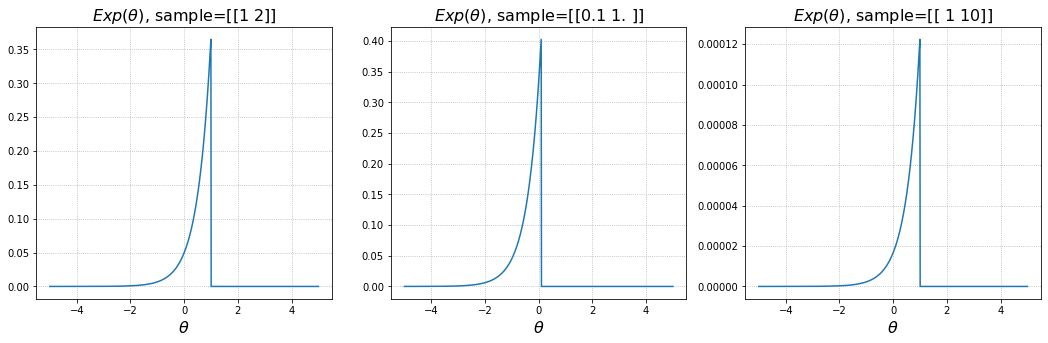

In [ ]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(loc=grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

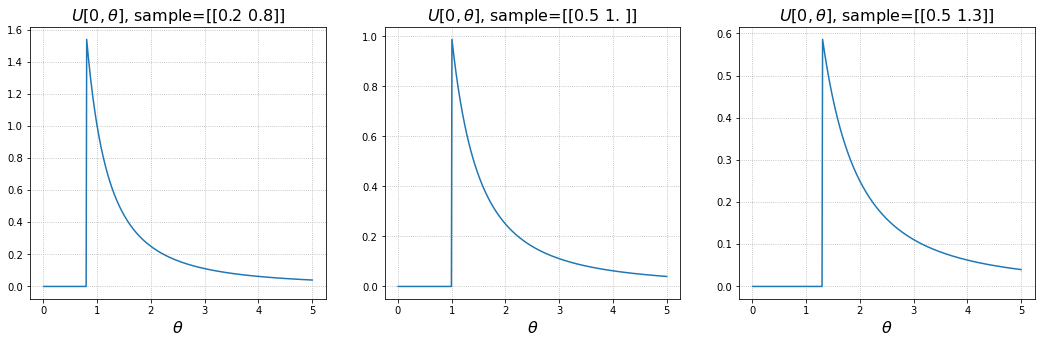

In [ ]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(scale=grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \\theta]$')

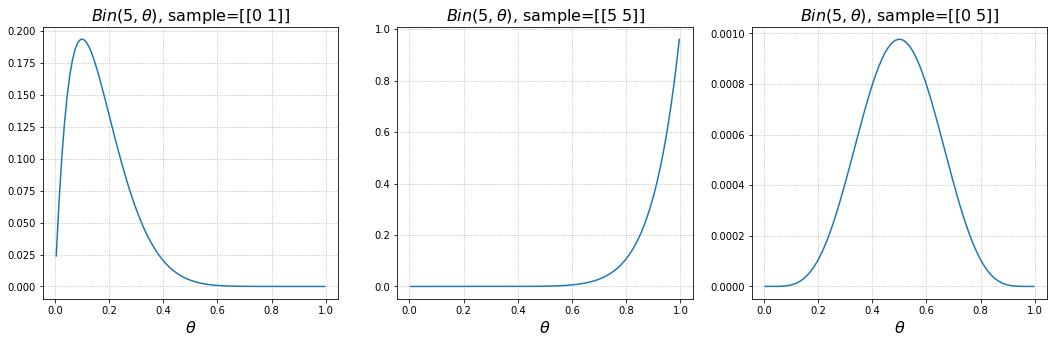

In [ ]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))

draw_likelihood(sps.binom(p=grid, n=5).pmf, grid, 
               [[0, 1], [5, 5], [0, 5]], '$Bin(5, \\theta)$')

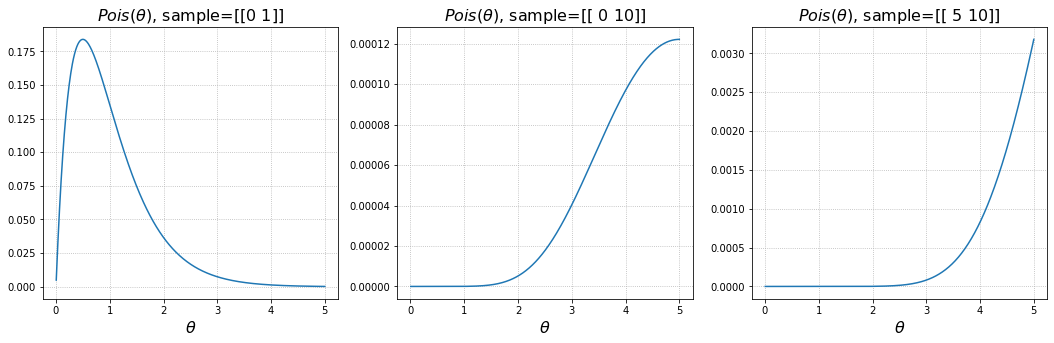

In [ ]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid, 
               [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')



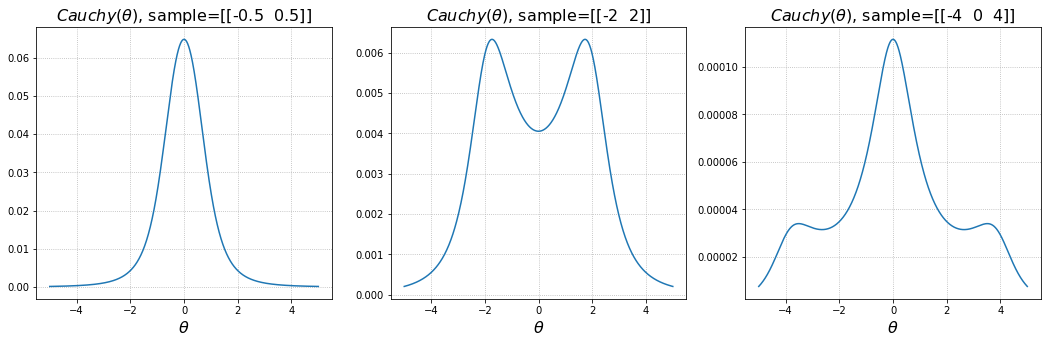

In [ ]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
               [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Сauchy(\\theta)$')




Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:**
По оси $х$ расположены значения $\theta$, по оси $у$ значения $l_X(\theta)$


a)Графики напоминяют колокол из-за того, что распределение симметрично. Функция правдоподобия является плотностью. Также можно заметить, что с увеличением $\theta$ увеличивается функция правдоподобия и достигает максимума в выборочном среднем

b)Функция правдоподобия не является плотностью. По графикам можно заметить, что наибольшее значение функции достигается при маленьких значениях выборки. С увеличением значений выборки функция уменьшается и быстро убывает(это можно использовать как сигналы того, что в выборке есть большие значения). 

с)Функция правдоподобия не является плотностью. При увеличении $\theta$ увеличивается функция, также максимум достигает в максимальном значении выборки. 

d)Функция правдоподобия является плотностью. График достигает максимума в значении $\theta$, равном отношению количества успехов к общему количеству испытаний. Эта функция принимает только дискретные значения.

e)Функция правдоподобия не является плотностью. Принимает только дискретные знвения.График достигает максимума в значении $\theta$, равном выборочному среднему.

f)Функция правдоподобия не является плотностью. Она убывает по обе стороны от точки, равной выборочному медиане. [-2, 2] два максимума, потому что которые лежат достаточно далеко от среднего значения распределения Коши












Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [ ]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

Результат отличается от ожидаемого, потому что при произведении плотностей вероятности для большого количества выборки произведение может быть очень маленьким числом, близким к нулю.  ->Теряем точность

Чтобы избежать этого можно использовать сумму логарифмов плотностей, т.е. использовать функцию логарифма правдоподобия
Так снижаем вероятность потери точности из-за слишком малых значений, поскольку сумма логарифмов плотностей всегда будет иметь отрицательные значения, но не будет очень близкой к нулю.



In [ ]:
sample = sps.norm.rvs(size=10**5)
likelihood = np.sum(np.log(sps.norm.pdf(sample)))
print(likelihood)

-142264.541404454


**Ответ на вопрос и описание метода решения проблемы:**
Чтобы избежать этого можно использовать сумму логарифмов плотностей, т.е. использовать функцию логарифма правдоподобия
Так снижаем вероятность потери точности из-за слишком малых значений, поскольку сумма логарифмов плотностей всегда будет иметь отрицательные значения, но не будет очень близкой к нулю.